In [16]:
import pandas as pd
import numpy as np

In [17]:
fake_df=pd.read_csv('Fake.csv')
true_df=pd.read_csv('True.csv')

In [18]:
display(fake_df.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [19]:
display(fake_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None

<BarContainer object of 6 artists>

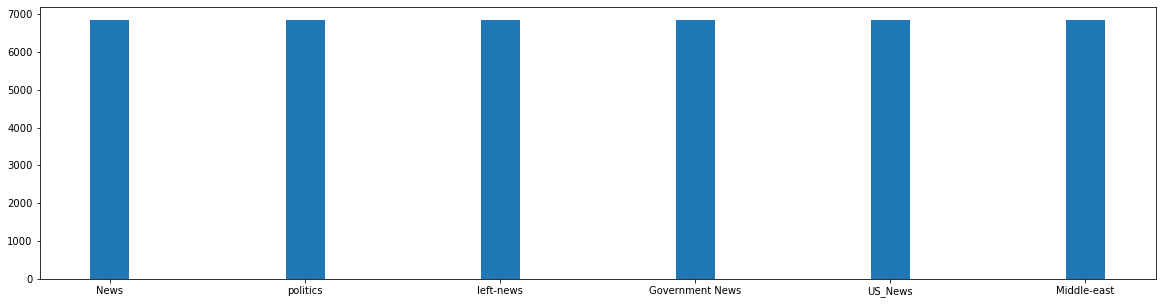

In [7]:
import matplotlib.pyplot as plt
# count sunjects in fake news dataset and plot them
x=fake_df.subject.value_counts().index
y=fake_df.subject.value_counts()[1]
plt.figure(figsize=(20,5));plt.bar(x,y,width=0.2)  

In [20]:
display(true_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

In [21]:
display(true_df.head())

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Index(['politicsNews', 'worldnews'], dtype='object')


<BarContainer object of 2 artists>

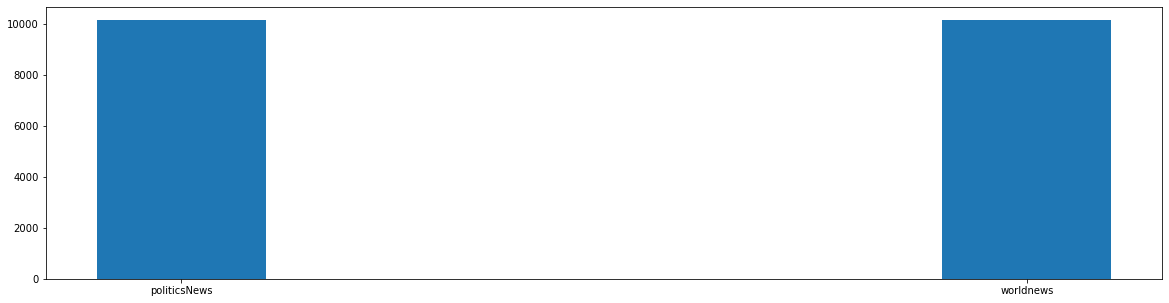

In [10]:
# count sunjects in true news dataset and plot them
import matplotlib.pyplot as plt
x=true_df.subject.value_counts().index
y=true_df.subject.value_counts()[1]
print(x)
plt.figure(figsize=(20,5));plt.bar(x,y,width=0.2)  

In [11]:
import re
# this function clean textes
def cleaned_text(text):
    # add space between numbers and chars
    text=re.sub('(\d+(\.\d+)?)', r' \1 ', text)
    # remove profile names  
    text=re.sub('(\(@[\w\s]*\))',"",text)
    # remove unwanted dots
    text=re.sub('(\.(\s\.)+)','',text)
    # remove urls
    text=re.sub('(\w*\.\w*)+.com','',text)
    return text

In [12]:
# create a new column 
# this column is the label  
fake_df['fake_or_true']='fake'
true_df['fake_or_true']='true'

In [13]:
# mege true and fake dataframe
data=pd.concat([fake_df,true_df],ignore_index=True,)

In [14]:
# encode labels to numeric value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.fake_or_true=le.fit_transform(data.fake_or_true)

In [22]:
# clean text data 
data.text=data.text.apply(cleaned_text)

In [23]:
# news text as X 
X=data['text']
# labels as y
y=data.fake_or_true

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
# english stop words 
stop_words=set(stopwords.words('english'))
# create count vectorizer for converting text to proper data
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stop_words)
X=vectorizer.fit_transform(X)

In [25]:
# split data into test and train datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [26]:
# using RndomForest as classifier 
from sklearn.ensemble import RandomForestClassifier
rcl=RandomForestClassifier(random_state=0)
rcl.fit(X_train,y_train)
print('Accuracy : {:.3f}'.format(rcl.score(X_test,y_test)))

Accuracy : 0.998
